# Применение методов машинного обучения для оптимизации распределения студентов по площадкам в рамках заключительного этапа студенческой олимпиады

# Содержание

1. [Введение](#Введение)
2. [Описание источника данных](#Описание-источника-данных)
3. [Задача 1](#Задача-1)
   1. [Задача 1.1](#Задача-1.1)
   2. [Задача 1.2](#Задача-1.2)
4. [Задача 2](#Задача-2)
5. [Задача 3](#Задача-3)
   1. [Задача 3.1](#Задача-3.1)
   2. [Задача 3.2](#Задача-3.2)
6. [Общие выводы по проведенному исследованию](#Общие-выводы-по-проведенному-исследованию)

# Введение

**Проблема:** Для повышения явки на очные площадки проведения заключительного этапа олимпиады необходимо оптимизировать ресурсы вузов-организаторов для повышения явки участников на соревнования.

**Цель**: Дать рекомендации по оптимизациюю распределения участников студенческой олимпиады по площадкам в рамках заключительного этапа нового сезона на основе анализа данных прошлого сезона.

**Исследовательский вопрос**: Как с помощью данных об участниках олимпиады и их явке на очные площадки в прошлом сезоне максимизировать явку и оптимизировать распределения участников по площадкам в новом сезоне олимпиады?

**Задачи**: 

1.1 Определить регионы с наибольшим и с наименьшим количеством участников в прошлом сезоне и учесть их при выборе места для проведения олимпиады по каждому направлению. 

1.2 Сделать визуализацию с распределением популярности площадок по карте России для каждого направления.

2. Создать модель, которая предскажет явку при сохранении текущих площадок в новом сезоне.

3.1 Создать модель, предсказывающую вероятность явки участника на площадку с учётом того, что площадка находится в регионе, отличном от региона местонахождения его вуза.

3.2 Вычислить вероятность того, что участник приедет на площадку не из своего региона.


# Описание источника данных

Данные представляют собой автоматически сгенерированную базу данных о всех зарегистрированных участниках олимпиады (669811 участников). База данных была предварительно деперсонализирована. Стоит отметить, что один и тот же студент может несколько раз встречаться в базе данных в виде нескольких участников, так как регистрация на каждое направление олимпиады происходит отдельно. Такое дублирование данных, однако, не окажет влияния на анализ: датасет будет разделён на части согласно разным направлениям олимпиады, множественное упоминание одного и того же участника не повлияет на результаты исследования. В датасете, отчищенном от персональных данных и закрытой информации, 39 столбцов: Дата регистраиции, Внутренний ID, ID дисциплины, Название дисциплины, Профиль участия, Категория участия, Пол, Гражданство, Рассылки, Курс, Ступень образования, Выпускной курс, Студент, Название университета, Город университета, Регион, ФО, Вуз не на территории РФ, Факультет, Специальность, Статус справки, Статус формы ID, Город проживания, Источник, Этап 1 Балл, Этап 2 Статус, Этап 2 Запрошенная площадка, Этап 2 Статус площадки, Этап 2 Площадки, Этап 2 Балл, Этап 2 Балл апелляции, Этап 3 Статус, Этап 3 Запрошенная площадка, Этап 3 Статус площадки, Этап 3 Площадки, Этап 3 Балл, Этап 3 Балл апелляции, Итоговый балл, Итоговый статус.

В первую очередь избавимся от ненужных переменных, в них входят:
- **Дата регистраиции:** у нас нет необходимости анализировать временные тренды регистрации на олимпиаду
- **Пол:** нерелевантен задачам
- **Гражданство:** нерелевантно задачам, так как в базе есть информации о географическом расположении вуза, в котором учится участник
- **Рассылки:** нерелевантно задачам, так как представляет собой бинарную переменную с информацией, подписался участник на рассылки или нет
- **Курс, Выпускной курс:** нерелевантно задачам, так как все учасники делятся на две категории по их ступени образования - бакалавриат или магистратура/специалитет
- **Студент, Статус формы ID:** нерелевантно задачам, так как представляют собой технические переменные
- **Статус справки:** нерелевантно задачам, так как представляет собой бинарную переменную с информацией, подтвердилась ли справка об обучении из вуза или нет
- **Источник:** нерелевантно задачам, так как представляет собой переменную с информацией, откуда участник узнал об олимпиаде
- **Ступень образования:** удаляется, так как полностью совпадает со столбцом Категория участия
- **Этап 1 Балл:** нерелевантно задачам
- **Факультет, Специальность:** информация о факультете и специальности студента, нерелевантны задачам

Отборочный (первый этап) проходил дистанционно для всех направлений, поэтому сразу после удаления ненужных столбцов отфильтруем базу данных по переменной "Этап 2 Статус", удалив строки с отсутствующими значениями для данного столбца. Таким образом, останутся только те участники, которые прошли в заключительный тур, где были очные соревнования.

В датасете для работы остаются 27 переменных:
- **Внутренний ID:** уникальный ID студента
- **ID дисциплины, Название дисциплины:** информация о дисциплине, для одной дисциплины может быть один или больше ID, в зависимости от того, в каких категориях (бакалавриат, магистратура/специалитет) проходит олимпиада и есть ли деление на профили (например, Востоковедение - деление на профили китаеведение, корееведение, японоведение)
- **Профиль участия:** профиль участия, если он есть у дисциплины
- **Категория участия:** в какой категории участвует студент - бакалавриат или магистратура/специалитет
- **Название университета, Город университета, Регион, ФО:** информация об университете студента и его локации
- **Вуз не на территории РФ:** бинарная переменная
- **Город проживания:** информация о городе проживания студента
- **Этап 2 Запрошенная площадка:** ссылка на онлайн-площадку, если у студента нет возможности посетить её очно
- **Этап 2 Статус площадки:** решение по запрошенной площадке
- **Этап 2 Площадки:** площадка второго этапа заключительного тура
- **Этап 2 Балл:** балл за второй этап заключительного тура
- **Этап 2 Балл апелляции:** балл после апелляции за второй этап заключительного тура
- **Этап 3 Статус:** статус по третьему этапу заключительного тура
- **Этап 3 Запрошенная площадка:** ссылка на онлайн-площадку, если у студента нет возможности посетить её очно
- **Этап 3 Статус площадки:** решение по запрошенной площадке
- **Этап 3 Площадки:** площадка третьего этапа заключительного тура
- **Этап 3 Балл:** балл за третий этап заключительного тура
- **Этап 3 Балл апелляции:** балл после апелляции за третий этап заключительного тура
- **Итоговый балл:** итоговый балл участника
- **Итоговый статус:** итоговый статус участника (участник, призер, победитель, медалист)

In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('registrationReport-season-89.csv', low_memory=False)

# Удаляем ненужные столбцы
columns_to_drop = ['Дата регистрации', 'Пол', 'Гражданство', 'Рассылки', 'Курс', 
                   'Выпускной курс', 'Студент', 'Факультет', 'Специальность', 'Статус формы ID', 'Статус справки', 'Источник', 'Ступень образования', 'Этап 1 Балл']

data_platforms = data.drop(columns=columns_to_drop)

data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,...,Этап 2 Балл,Этап 2 Балл апелляции,Этап 3 Статус,Этап 3 Запрошенная площадка,Этап 3 Статус площадки,Этап 3 Площадки,Этап 3 Балл,Этап 3 Балл апелляции,Итоговый балл,Итоговый статус
0,1181802,594,Гостиничное дело,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,Приглашён по баллам,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1181802,595,Государственное и муниципальное управление,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1181802,599,Инноватика,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1181802,602,Классный руководитель,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1181802,610,Менеджмент,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Посмотрим, какой размер датасета
data_platforms.shape

(669812, 25)

In [3]:
# Выводим список всех столбцов
print(data_platforms.keys())

Index(['Внутренний ID', 'ID дисциплины', 'Название дисциплины',
       'Профиль участия', 'Категория участия', 'Название университета',
       'Город университета', 'Регион', 'ФО', 'Вуз не на территории РФ',
       'Город проживания', 'Этап 2 Статус', 'Этап 2 Запрошенная площадка',
       'Этап 2 Статус площадки', 'Этап 2 Площадки', 'Этап 2 Балл',
       'Этап 2 Балл апелляции', 'Этап 3 Статус', 'Этап 3 Запрошенная площадка',
       'Этап 3 Статус площадки', 'Этап 3 Площадки', 'Этап 3 Балл',
       'Этап 3 Балл апелляции', 'Итоговый балл', 'Итоговый статус'],
      dtype='object')


In [4]:
# Исключаем из базы данных участников, которые не прошли в заключительный тур, а после удаляем этот столбец
data_platforms = data_platforms.dropna(subset=['Этап 2 Статус'])
data_platforms = data_platforms.drop(columns=['Этап 2 Статус'])

# Сбросим первоначальную индексацию для удобства
data_platforms = data_platforms.reset_index(drop=True)

data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,...,Этап 2 Балл,Этап 2 Балл апелляции,Этап 3 Статус,Этап 3 Запрошенная площадка,Этап 3 Статус площадки,Этап 3 Площадки,Этап 3 Балл,Этап 3 Балл апелляции,Итоговый балл,Итоговый статус
0,1181802,594,Гостиничное дело,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,Приглашён по баллам,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1181802,616,Педагогическое образование (основное),NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1181802,621,Региональное развитие и урбанистика,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,Участник
3,1181802,624,Социальная работа и организация работы с молод...,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,80,80.0,Приглашён по баллам,NaN,NaN,NaN,61,NaN,161.0,Победитель
4,1181802,627,Спортивный тренер и фитнес-индустрия,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Посмотрим, как изменился датасет после фильтрации
data_platforms.shape

(39460, 24)

# Описание обнаруженных проблем в данных

- Попробуем уменьшить количество столбцов и унифицировать данные. Для второго этапа под запрошенными площадками подразумевались онлайн-платформы для тех участников, которые не могли приехать на очную площадку, поэтому просто пропишем в столбце 'Этап 2 Площадки' онлайн, если в 'Этап 2 Запрошенная площадка' есть какое-то значение.
- Для столбцов с информацией по площадкам третьего этапа просто удалим столбцы "Этап 3 Запрошенная площадка" и "Этап 3 Статус площадки", так как известно, что все заявки на изменения площадки были одобрены.
- В данных есть аккаунты, созданные для тестирования функций организаторами. Стоит выполнить удаление подобных записей. Известно, что у этих аккаунтов стоит балл 666 за третий этап олимпиады
- Для дальнейшего уменьшения количества столбцов, перенесём баллы из столбца "Этап 2 Балл апелляции" в "Этап 2 Балл", если была подана апелляция. То же самое сделаем для третьего этапа.

In [6]:
# Если в 'Этап 2 Запрошенная площадка' есть значение, в 'Этап 2 Площадки' прописать 'Онлайн'
data_platforms.loc[data_platforms['Этап 2 Запрошенная площадка'].notnull(), 'Этап 2 Площадки'] = 'Онлайн'

# Удаление столбцов 'Этап 2 Запрошенная площадка' и 'Этап 2 Статус площадки'
data_platforms.drop(['Этап 2 Запрошенная площадка', 'Этап 2 Статус площадки'], axis=1, inplace=True)

# Удаление столбцов 'Этап 3 Запрошенная площадка' и 'Этап 3 Статус площадки'
data_platforms.drop(['Этап 3 Запрошенная площадка', 'Этап 3 Статус площадки'], axis=1, inplace=True)

# Удаление тестовых аккаунтов, где балл за 3 этап равен 666
data_platforms = data_platforms[data_platforms['Этап 3 Балл'] != 666.0]


# Перенос баллов из столбцов апелляции в основные столбцы баллов

# Для Этапа 2: если балл апелляции присутствует, перенести его в основной столбец баллов
data_platforms.loc[data_platforms['Этап 2 Балл апелляции'].notnull(), 'Этап 2 Балл'] = data_platforms['Этап 2 Балл апелляции']

# Для Этапа 3: аналогично
data_platforms.loc[data_platforms['Этап 3 Балл апелляции'].notnull(), 'Этап 3 Балл'] = data_platforms['Этап 3 Балл апелляции']

# Теперь можно удалить столбцы апелляции
data_platforms.drop(['Этап 2 Балл апелляции', 'Этап 3 Балл апелляции'], axis=1, inplace=True)

data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,Город проживания,Этап 2 Площадки,Этап 2 Балл,Этап 3 Статус,Этап 3 Площадки,Этап 3 Балл,Итоговый балл,Итоговый статус
0,1181802,594,Гостиничное дело,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,Приглашён по баллам,NaN,NaN,NaN,NaN
1,1181802,616,Педагогическое образование (основное),NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1181802,621,Региональное развитие и урбанистика,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,67,NaN,NaN,NaN,67.0,Участник
3,1181802,624,Социальная работа и организация работы с молод...,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,80.0,Приглашён по баллам,NaN,61,161.0,Победитель
4,1181802,627,Спортивный тренер и фитнес-индустрия,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Посмотрим, как изменился датасет после изменений
data_platforms.shape

(39460, 18)

In [8]:
# Посмотрим на площадки второго и третьего этапа заключительного тура
data_platforms["Этап 2 Площадки"].unique()

array([nan, 'Москва', 'Онлайн', 'берли'], dtype=object)

In [9]:
data_platforms["Этап 2 Площадки"].value_counts()

Онлайн    2
Москва    1
берли     1
Name: Этап 2 Площадки, dtype: int64

Было принято решение удалить информацию о втором этапе заключительного тура, так как лишь 4 участника имеют данные по площадкам второго этапа. Кроме того, эти площадки включают онлайн, вероятную ошибку в данных и Москву (самую популярную площадку).

In [10]:
# Удаление оригинальных столбцов с баллами
data_platforms.drop(['Этап 2 Площадки', 'Этап 2 Балл'], axis=1, inplace=True)
data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,Город проживания,Этап 3 Статус,Этап 3 Площадки,Этап 3 Балл,Итоговый балл,Итоговый статус
0,1181802,594,Гостиничное дело,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",Приглашён по баллам,NaN,NaN,NaN,NaN
1,1181802,616,Педагогическое образование (основное),NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,NaN,NaN
2,1181802,621,Региональное развитие и урбанистика,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,67.0,Участник
3,1181802,624,Социальная работа и организация работы с молод...,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",Приглашён по баллам,NaN,61,161.0,Победитель
4,1181802,627,Спортивный тренер и фитнес-индустрия,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,NaN,NaN


In [11]:
data_platforms["Этап 3 Площадки"].unique()

array([nan, 'Санкт-Петербург', 'Москва', 'Томск', 'Владивосток',
       'Барнаул', 'Екатеринбург', 'Казань', 'Где-то', 'Караганда', 'Тест',
       'Краснодар', 'Ростов-на-Дону', 'Самара', 'Новосибирск', 'Тюмень',
       'Уфа', 'Москва - Первый МГМУ им. И.М. Сеченова', 'Нижний Новгород',
       'Иваново', 'Красноярск', 'Челябинск', 'Махачкала', 'Омск',
       'Калининград', 'Пермь', 'Оренбург',
       'Москва - МГМСУ им. А.И. Евдокимова', 'Хабаровск', 'Владикавказ',
       'Улан-Удэ', 'Киров', 'Севастополь', 'Пятигорск', 'Подтверждено'],
      dtype=object)

In [12]:
data_platforms["Этап 3 Площадки"].value_counts()

Москва                                    4297
Санкт-Петербург                           2358
Томск                                     1113
Екатеринбург                               663
Ростов-на-Дону                             510
Казань                                     498
Владивосток                                372
Уфа                                        313
Самара                                     306
Барнаул                                    223
Тюмень                                     212
Новосибирск                                157
Москва - Первый МГМУ им. И.М. Сеченова     132
Нижний Новгород                             97
Красноярск                                  68
Краснодар                                   59
Махачкала                                   42
Пермь                                       35
Оренбург                                    33
Челябинск                                   31
Владикавказ                                 25
Москва - МГМС

Удалим те значения, которые встречаются лишь однажды. Это значит, что таких площадок не было в действительности.

In [13]:
# Значения для удаления
fake_platforms = ["Где-то", "Караганда", "Тест", "Улан-Удэ", "Пятигорск", "Подтверждено"]

# Удаление строк, содержащих указанные значения в столбце "Этап 3 Площадки"
data_platforms = data_platforms[~data_platforms['Этап 3 Площадки'].isin(fake_platforms)]

# Проверим результат
data_platforms["Этап 3 Площадки"].value_counts()

Москва                                    4297
Санкт-Петербург                           2358
Томск                                     1113
Екатеринбург                               663
Ростов-на-Дону                             510
Казань                                     498
Владивосток                                372
Уфа                                        313
Самара                                     306
Барнаул                                    223
Тюмень                                     212
Новосибирск                                157
Москва - Первый МГМУ им. И.М. Сеченова     132
Нижний Новгород                             97
Красноярск                                  68
Краснодар                                   59
Махачкала                                   42
Пермь                                       35
Оренбург                                    33
Челябинск                                   31
Владикавказ                                 25
Москва - МГМС

Переименуем площадки "Москва - Первый МГМУ им. И.М. Сеченова" и "Москва - МГМСУ им. А.И. Евдокимова" в "Москва", так как в нашем исследовании нужны именно города.

In [14]:
# Замена значений в столбце "Этап 3 Площадки"
data_platforms['Этап 3 Площадки'] = data_platforms['Этап 3 Площадки'].replace(
    ["Москва - МГМСУ им. А.И. Евдокимова", "Москва - Первый МГМУ им. И.М. Сеченова"], "Москва")

# Проверим результат
data_platforms['Этап 3 Площадки'].value_counts()

Москва             4452
Санкт-Петербург    2358
Томск              1113
Екатеринбург        663
Ростов-на-Дону      510
Казань              498
Владивосток         372
Уфа                 313
Самара              306
Барнаул             223
Тюмень              212
Новосибирск         157
Нижний Новгород      97
Красноярск           68
Краснодар            59
Махачкала            42
Пермь                35
Оренбург             33
Челябинск            31
Владикавказ          25
Киров                17
Хабаровск            16
Иваново              13
Севастополь           7
Калининград           6
Омск                  4
Name: Этап 3 Площадки, dtype: int64

- Проведём ещё одно преобразование: столбец 'Этап 3 Балл' переведём в бинарный формат и переименуем в 'Этап 3 Явка'. Если значение не пропущено, участник был на очном этапе (1), если пропуск - 0. Нам важна явка, а не итоговый балл участника.

In [15]:
# Создание бинарного столбца для явки на Этап 3

data_platforms['Этап 3 Явка'] = data_platforms['Этап 3 Балл'].notnull().astype(int)

# Удаление оригинального столбца с баллами
data_platforms.drop(['Этап 3 Балл'], axis=1, inplace=True)

data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,Город проживания,Этап 3 Статус,Этап 3 Площадки,Итоговый балл,Итоговый статус,Этап 3 Явка
0,1181802,594,Гостиничное дело,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",Приглашён по баллам,NaN,NaN,NaN,0
1,1181802,616,Педагогическое образование (основное),NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,NaN,0
2,1181802,621,Региональное развитие и урбанистика,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,67.0,Участник,0
3,1181802,624,Социальная работа и организация работы с молод...,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",Приглашён по баллам,NaN,161.0,Победитель,1
4,1181802,627,Спортивный тренер и фитнес-индустрия,NaN,Бакалавриат,Дальневосточный федеральный университет,Владивосток,Приморский край,Дальневосточный,Нет,"Владивосток, Приморский край",NaN,NaN,NaN,NaN,0


В данном исследовании мы фокусируемся именно на площадках, поээтому нам неинтересны участники, для которых не была заготовлена площадка. Избавимся от строк с пустым значением в столбце "Этап 3 Площадки".

In [16]:
# Исключаем из базы данных подобных участников
data_platforms = data_platforms.dropna(subset=['Этап 3 Площадки'])

# Сбросим первоначальную индексацию для удобства
data_platforms = data_platforms.reset_index(drop=True)

data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,Город проживания,Этап 3 Статус,Этап 3 Площадки,Итоговый балл,Итоговый статус,Этап 3 Явка
0,1181804,628,Строительство,NaN,Бакалавриат,Петербургский государственный университет путе...,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Нет,"Санкт-Петербург, Санкт-Петербург и Ленинградск...",Приглашён по баллам,Санкт-Петербург,NaN,NaN,0
1,1181804,641,Экология,NaN,Бакалавриат,Петербургский государственный университет путе...,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Нет,"Санкт-Петербург, Санкт-Петербург и Ленинградск...",Приглашён по баллам,Санкт-Петербург,NaN,NaN,0
2,1181806,708,Экология,NaN,Магистратура/Специалитет,Российский государственный университет нефти и...,Москва,Москва,Москва,Нет,"Москва, Москва и Московская область",Приглашён по баллам,Москва,NaN,NaN,0
3,1181808,657,Биотехнологии,NaN,Магистратура/Специалитет,Сибирский государственный медицинский университет,Томск,Томская область,Сибирский,Нет,"Томск, Томская область",Приглашён по баллам,Томск,21.0,Участник,1
4,1181808,689,Психология,NaN,Магистратура/Специалитет,Сибирский государственный медицинский университет,Томск,Томская область,Сибирский,Нет,"Томск, Томская область",Приглашён по баллам,Томск,30.0,Участник,1


Известно, что одни и те же студенты могут участвовать в олимпиаде сразу по нескольким направлениям, причем эти направления часто принадлежат к одной укрупненной категории. Для дальнейшего анализа распределим всем дисциплины по укрупненным категориям, которые указаны на сайте (https://yandex.ru/profi/courses2023?name=agroIndustrialComplex)

In [17]:
# Получим список всех направлений прошлого сезона
list(data_platforms["Название дисциплины"].unique())

['Строительство',
 'Экология',
 'Биотехнологии',
 'Психология',
 'Индустрия питания',
 'Социология',
 'Экономика',
 'Геология',
 'Фармация',
 'Машиностроение',
 'Финансы и кредит',
 'Инноватика',
 'Электроника, радиотехника и системы связи',
 'Теплоэнергетика и теплотехника',
 'Филология',
 'Стоматология',
 'Лингвистика',
 'Материаловедение и технологии материалов',
 'Лечебное дело и педиатрия',
 'Медико-профилактическое дело']

In [18]:
# Создание словаря сопоставления между названиями дисциплин и укрупненными категориями
discipline_dict = {
    'Гостиничное дело': 'Социально-экономические науки',
    'Педагогическое образование (основное)': 'Педагогические науки',
    'Региональное развитие и урбанистика': 'Социально-экономические науки',
    'Социальная работа и организация работы с молодежью': 'Социально-экономические науки',
    'Спортивный тренер и фитнес-индустрия': 'Физическая культура',
    'Туризм': 'Социально-экономические науки',
    'Строительство': 'Инженерные науки и технологии',
    'Экология': 'Естественные науки',
    'Медико-профилактическое дело': 'Медицина и здравоохранение',
    'Химическая технология': 'Естественные науки',
    'Креативные индустрии': 'Искусство и гуманитарные науки',
    'Биотехнологии': 'Естественные науки',
    'Психология': 'Социально-экономические науки',
    'Биоинженерия и биоинформатика': 'Естественные науки',
    'Биология': 'Естественные науки',
    'География': 'Естественные науки',
    'Индустрия питания': 'Агропромышленный комплекс и пищевые технологии',
    'Освоение космоса': 'Инженерные науки и технологии',
    'Торговое дело': 'Социально-экономические науки',
    'Агропромышленный комплекс (Агрономия)': 'Агропромышленный комплекс и пищевые технологии',
    'Государственное и муниципальное управление': 'Социально-экономические науки',
    'Классный руководитель': 'Педагогические науки',
    'Менеджмент': 'Социально-экономические науки',
    'Продюсирование': 'Искусство и гуманитарные науки',
    'Реклама и связи с общественностью': 'Социально-экономические науки',
    'Социология': 'Социально-экономические науки',
    'Транспорт': 'Инженерные науки и технологии',
    'Экономика': 'Социально-экономические науки',
    'Экономическая безопасность': 'Социально-экономические науки',
    'Автомобилестроение': 'Инженерные науки и технологии',
    'Программная инженерия': 'Компьютерные науки',
    'Геология': 'Естественные науки',
    'Специальное (дефектологическое) образование': 'Педагогические науки',
    'Математика': 'Естественные науки',
    'Фармация': 'Медицина и здравоохранение',
    'Квантовые технологии': 'Естественные науки',
    'Авиастроение': 'Инженерные науки и технологии',
    'Безопасность информационных систем и технологий критически важных объектов': 'Компьютерные науки',
    'Бизнес-информатика': 'Социально-экономические науки',
    'Ветеринария и зоотехния': 'Агропромышленный комплекс и пищевые технологии',
    'Востоковедение: китаеведение, корееведение, японоведение': 'Искусство и гуманитарные науки',
    'Дизайн': 'Искусство и гуманитарные науки',
    'Журналистика': 'Искусство и гуманитарные науки',
    'Инноватика': 'Инженерные науки и технологии',
    'Информационная и кибербезопасность': 'Компьютерные науки',
    'Искусственный интеллект': 'Компьютерные науки',
    'Лазерные, плазменные и радиационные технологии': 'Инженерные науки и технологии',
    'Лингвистика': 'Искусство и гуманитарные науки',
    'Математическое моделирование': 'Естественные науки',
    'Материаловедение и технологии материалов': 'Инженерные науки и технологии',
    'Машиностроение': 'Инженерные науки и технологии',
    'Металлургия': 'Инженерные науки и технологии',
    'Нанотехнологии в электронике и радиофотонике': 'Инженерные науки и технологии',
    'Нефтегазовое дело': 'Естественные науки',
    'Педагогическое образование (дошкольное)': 'Педагогические науки',
    'Программирование и информационные технологии': 'Компьютерные науки',
    'Робототехника': 'Компьютерные науки',
    'Теплоэнергетика и теплотехника': 'Инженерные науки и технологии',
    'Технологии медицины будущего': 'Инженерные науки и технологии',
    'Углеродное регулирование': 'Естественные науки',
    'Физика': 'Естественные науки',
    'Физика и технологии уникальных научных установок класса «мегасайенс»': 'Естественные науки',
    'Филология': 'Искусство и гуманитарные науки',
    'Финансы и кредит': 'Социально-экономические науки',
    'Химия': 'Естественные науки',
    'Электроника, радиотехника и системы связи': 'Инженерные науки и технологии',
    'Электроэнергетика': 'Инженерные науки и технологии',
    'Юриспруденция': 'Социально-экономические науки',
    'Ядерные физика и технологии': 'Инженерные науки и технологии',
    'Вооружение и военная техника': 'Вооружение и военная техника',
    'Горное дело': 'Инженерные науки и технологии',
    'Лечебное дело и педиатрия': 'Медицина и здравоохранение',
    'Стоматология': 'Медицина и здравоохранение'
}

# Применение словаря для обновления названий дисциплин в столбце "Название дисциплины"
data_platforms['Название дисциплины'] = data_platforms['Название дисциплины'].map(discipline_dict).fillna(data_platforms['Название дисциплины'])

# Проверим результат
data_platforms['Название дисциплины'].value_counts()

Социально-экономические науки                     3463
Инженерные науки и технологии                     3154
Естественные науки                                2376
Искусство и гуманитарные науки                    1772
Агропромышленный комплекс и пищевые технологии     462
Медицина и здравоохранение                         403
Name: Название дисциплины, dtype: int64

In [19]:
data_platforms.to_csv("data_platforms.csv")

# Задача 1

## Задача 1.1

*Определить регионы с наибольшим и с наименьшим  количеством участников в прошлом сезоне и учесть их при выборе места для проведения олимпиады по каждому направлению.*

Начнём с задачи определения наиболее популярных регионов для каждого направления и создания визуализации наиболее популярных площадок для каждого направления.

In [20]:
# Устанавливаем необходимые библиотеки

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from shapely.geometry import Point
import seaborn as sns

/var/folders/j6/fsfbdqkx19525s2mhc_50rk40000gn/T/ipykernel_14212/889694191.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_pivot = heatmap_data.pivot("Название дисциплины", "Этап 3 Площадки", "Количество участников")


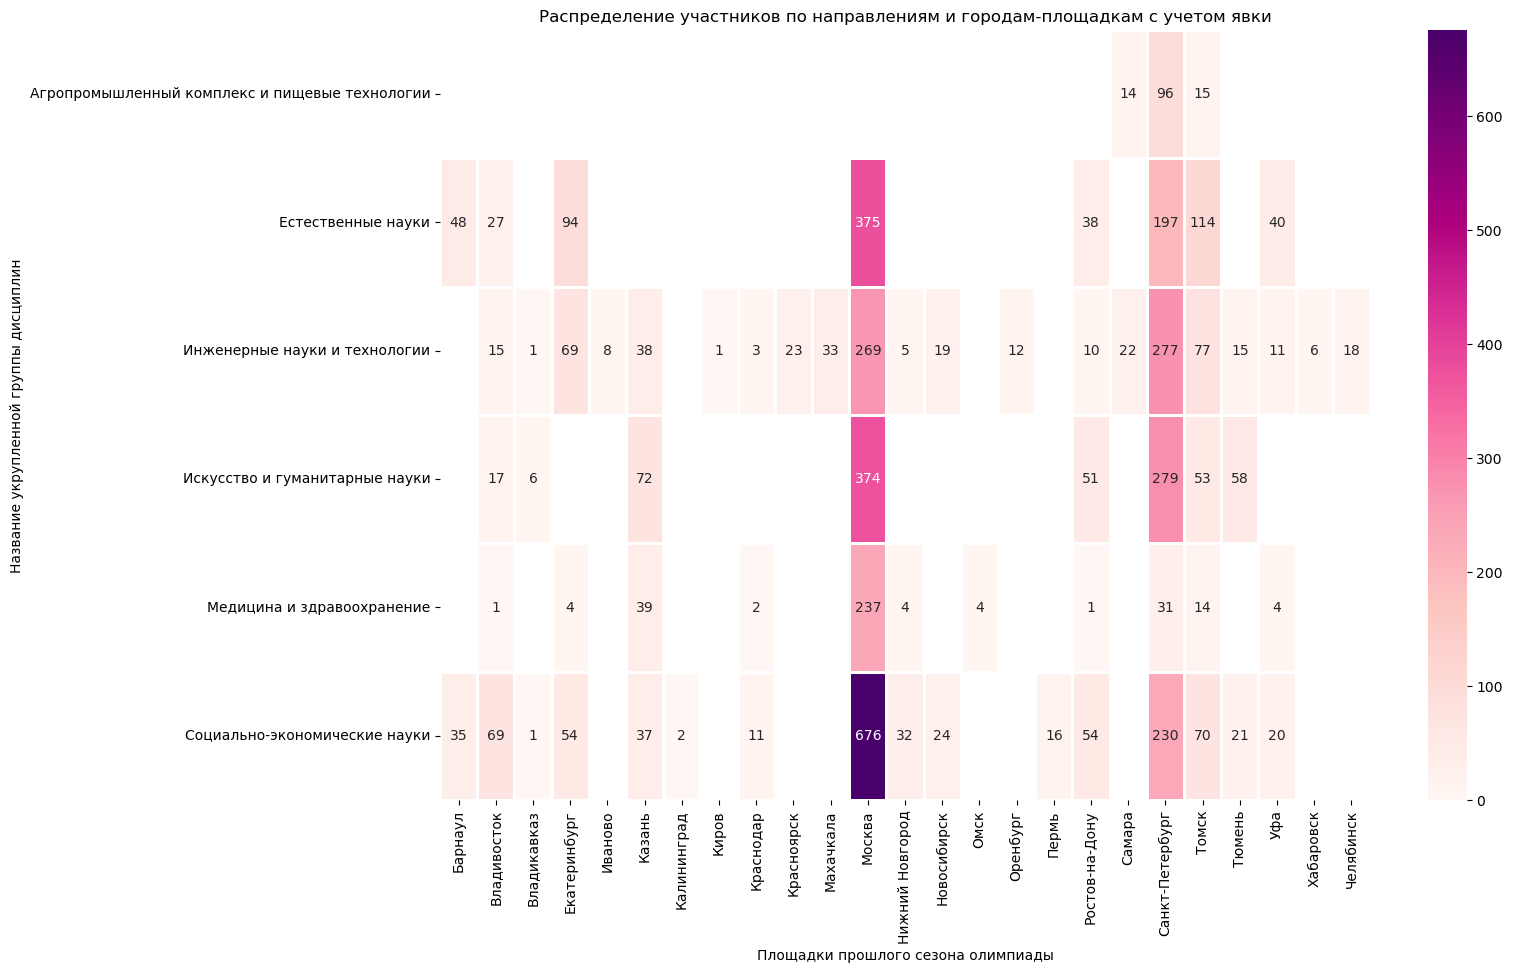

In [21]:
# Фильтрация данных по "Этап 3 Явка" (учитываем только тех, кто явился на третий этап)
filtered_data = data_platforms[data_platforms['Этап 3 Явка'] == 1]

# Группировка данных по направлениям и городам-площадкам
heatmap_data = filtered_data.groupby(['Название дисциплины', 'Этап 3 Площадки']).size().reset_index(name='Количество участников')

# Подготовка данных для heatmap
heatmap_pivot = heatmap_data.pivot("Название дисциплины", "Этап 3 Площадки", "Количество участников")

# Создание и визуализация heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", linewidths=1, cmap="RdPu", vmin=0)
plt.title("Распределение участников по направлениям и городам-площадкам с учетом явки")
plt.ylabel("Название укрупленной группы дисциплин")
plt.xlabel("Площадки прошлого сезона олимпиады")
plt.show()

/var/folders/j6/fsfbdqkx19525s2mhc_50rk40000gn/T/ipykernel_14212/1418343838.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_pivot = attendance_data.pivot("Название дисциплины", "Этап 3 Площадки", "Процент явки")


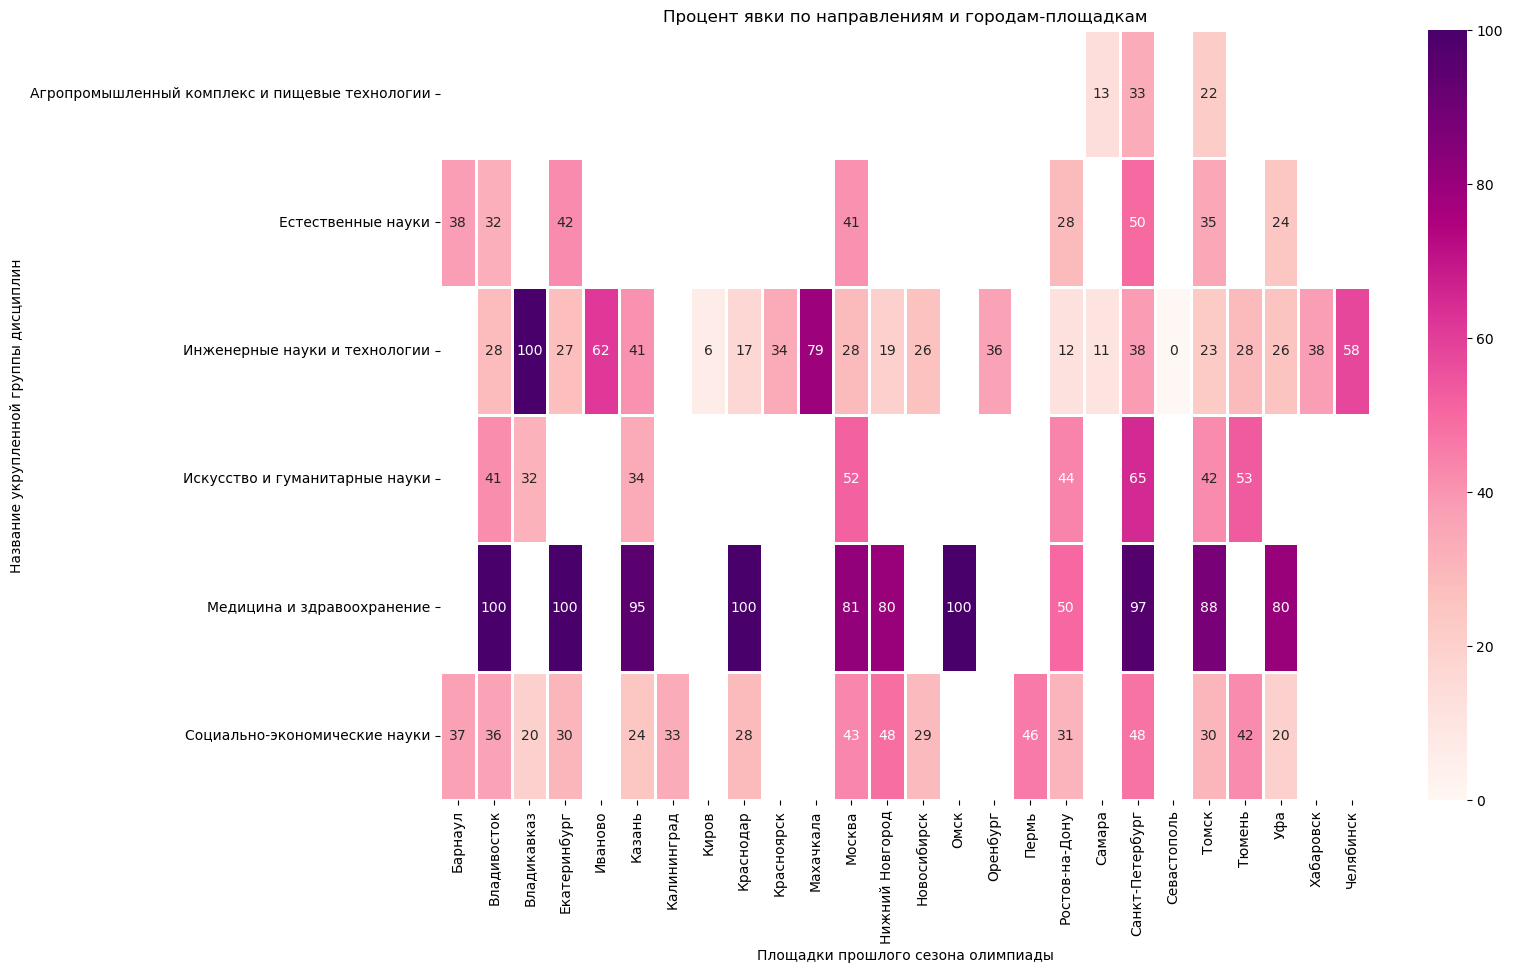

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Расчет общего количества участников по направлениям и площадкам
total_participants = data_platforms.groupby(['Название дисциплины', 'Этап 3 Площадки']).size().reset_index(name='Всего участников')

# Расчет количества участников, явившихся на третий этап
attended_participants = data_platforms[data_platforms['Этап 3 Явка'] == 1].groupby(['Название дисциплины', 'Этап 3 Площадки']).size().reset_index(name='Явка')

# Объединение данных для расчета процентов явки
attendance_data = pd.merge(total_participants, attended_participants, on=['Название дисциплины', 'Этап 3 Площадки'], how='left')
attendance_data['Явка'] = attendance_data['Явка'].fillna(0)  # Заполняем нулями, где явка равна 0
attendance_data['Процент явки'] = (attendance_data['Явка'] / attendance_data['Всего участников']) * 100

# Подготовка данных для heatmap
heatmap_pivot = attendance_data.pivot("Название дисциплины", "Этап 3 Площадки", "Процент явки")

# Создание и визуализация heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", linewidths=1, cmap="RdPu", vmin=0, vmax=100)
plt.title("Процент явки по направлениям и городам-площадкам")
plt.ylabel("Название укрупленной группы дисциплин")
plt.xlabel("Площадки прошлого сезона олимпиады")
plt.show()

## Задача 1.2

*Сделать визуализацию с распределением популярности площадок по карте России для каждого направления.*

In [22]:
# Группировка данных по направлениям и городам-площадкам
platforms_by_discipline = data_platforms.groupby(['Название дисциплины', 'Этап 3 Площадки']).size().reset_index(name='Количество участников')

# Подготовка словаря с координатами крупных городов России (заглушка для меньших городов)
city_coordinates = {
    "Москва": [55.7558, 37.6176],
    "Санкт-Петербург": [59.9343, 30.3351],
    "Томск": [56.4846, 84.9482],
    "Екатеринбург": [56.8389, 60.6057],
    "Ростов-на-Дону": [47.2225, 39.7188],
    "Казань": [55.8304, 49.0661],
    "Владивосток": [43.1155, 131.8855],
    "Уфа": [54.7388, 55.9721],
    "Самара": [53.2415, 50.2212],
    "Барнаул": [53.3561, 83.7496],
    "Тюмень": [57.1522, 65.5272],
    "Новосибирск": [55.0084, 82.9357],
    "Нижний Новгород": [56.2965, 43.9361],
    "Красноярск": [56.0153, 92.8932],
    "Краснодар": [45.0355, 38.9753],
    "Махачкала": [42.9849, 47.5046],
    "Пермь": [58.0104, 56.2342],
    "Оренбург": [51.7682, 55.0969],
    "Челябинск": [55.1644, 61.4368],
    "Владикавказ": [43.0246, 44.6820],
    "Киров": [58.6036, 49.6679],
    "Хабаровск": [48.4802, 135.0719],
    "Иваново": [57.0003, 40.9739],
    "Севастополь": [44.6167, 33.5254],
    "Калининград": [54.7104, 20.5106],
    "Омск": [54.9924, 73.3686]
}

/var/folders/j6/fsfbdqkx19525s2mhc_50rk40000gn/T/ipykernel_57649/798475744.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  russia_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Russia'")


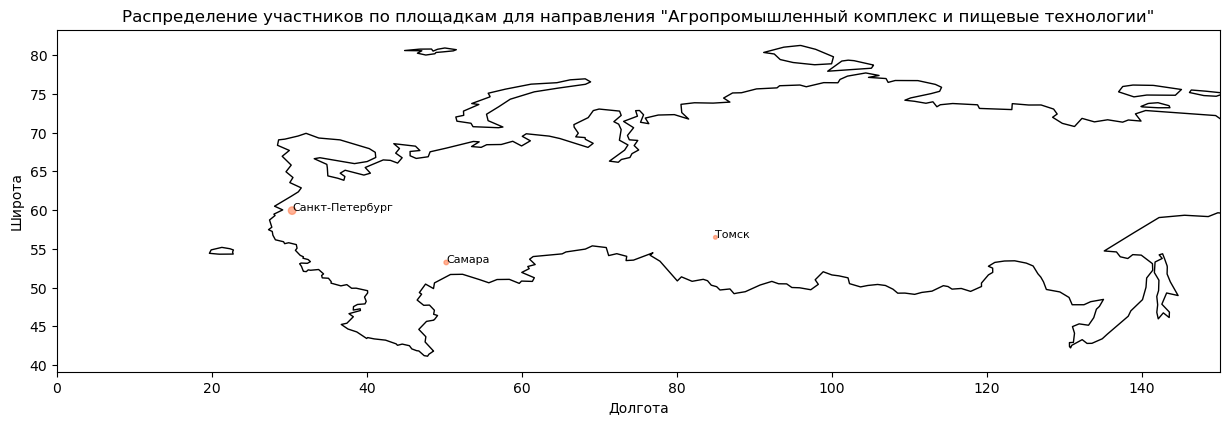

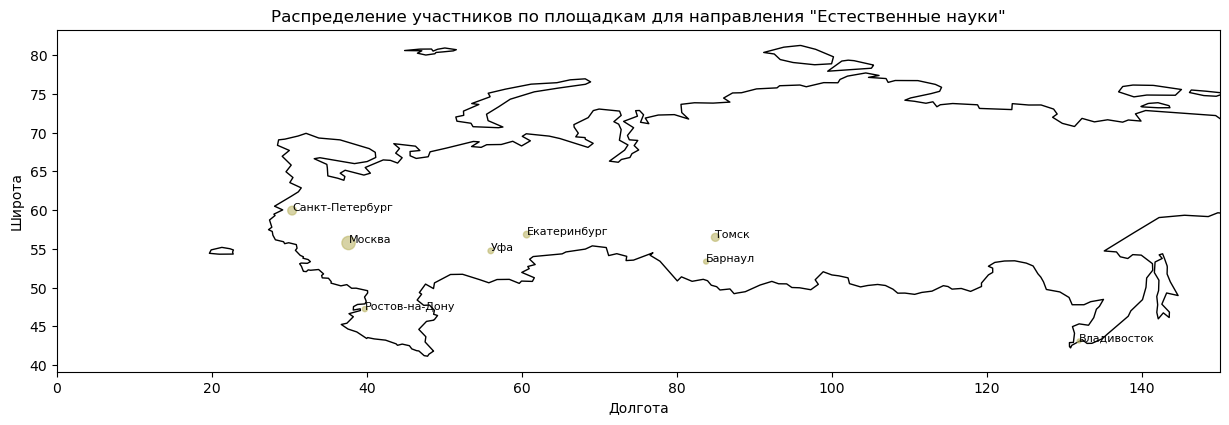

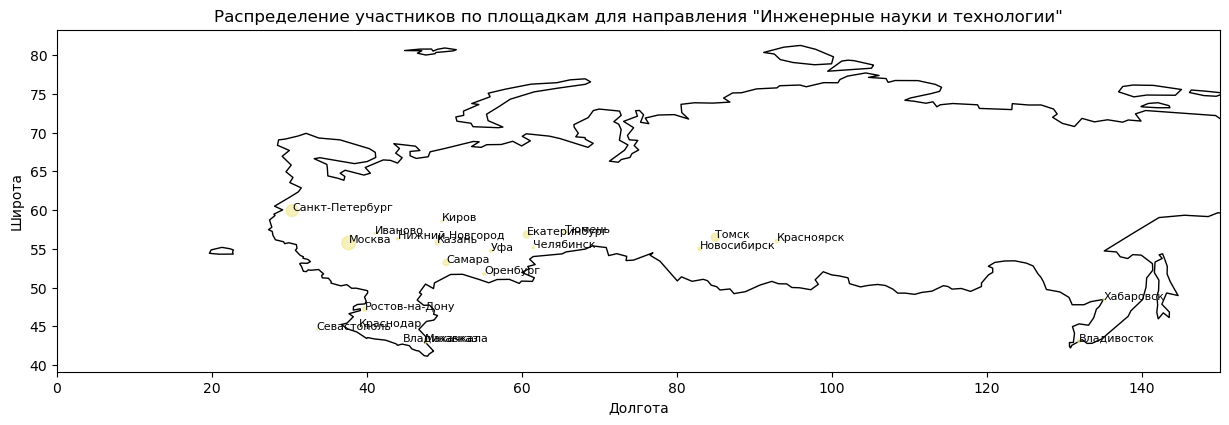

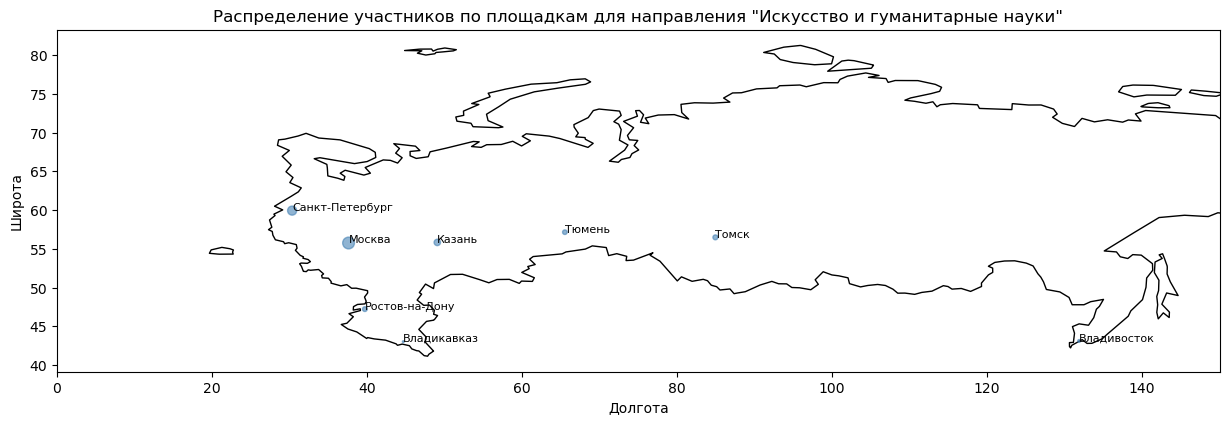

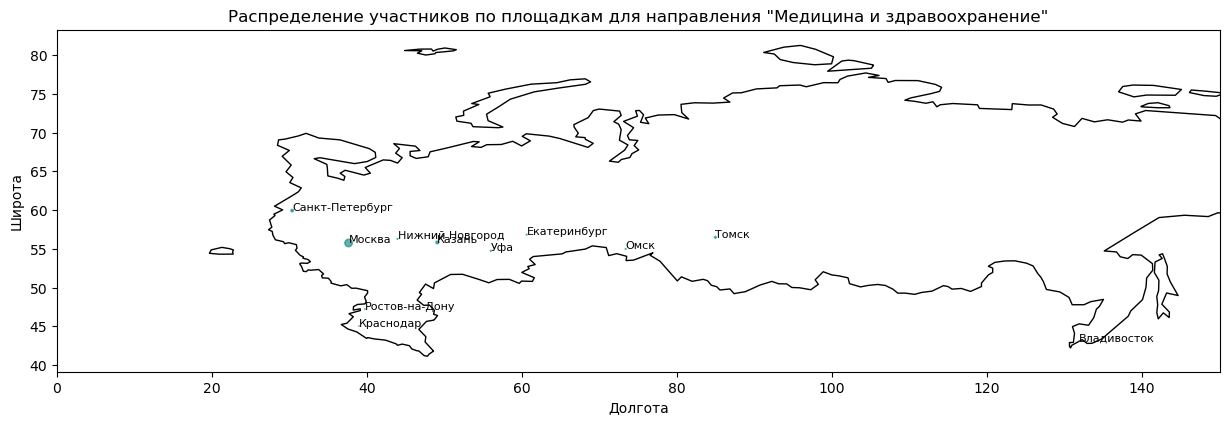

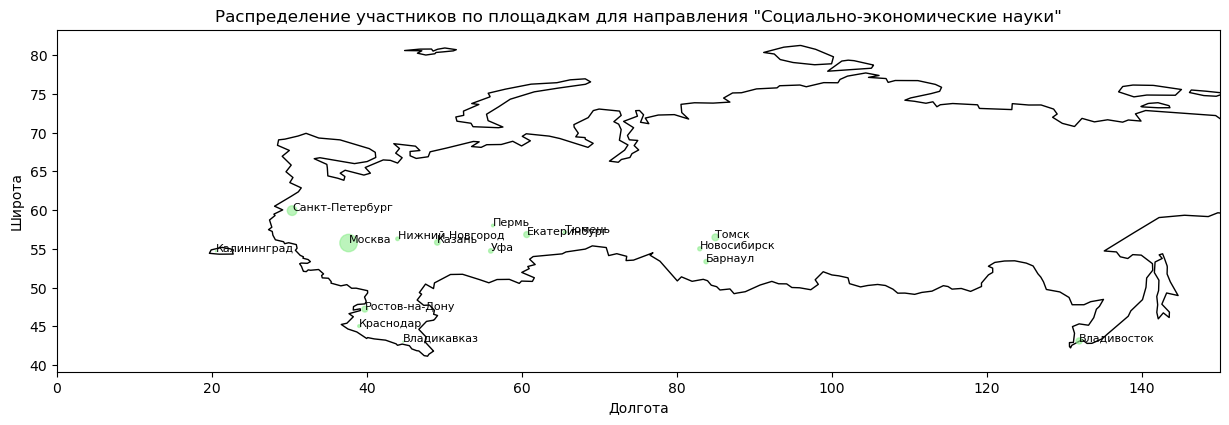

In [23]:
# Функция для извлечения координат города
def get_coordinates(city):
    return city_coordinates.get(city, [0, 0])  # Возвращаем заглушку, если город не найден

# Применение функции для получения координат
platforms_by_discipline['coordinates'] = platforms_by_discipline['Этап 3 Площадки'].apply(get_coordinates)

# Загружаем карту России
russia_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Russia'")

# Создание GeoDataFrame
gdf = gpd.GeoDataFrame(
    platforms_by_discipline, 
    geometry=gpd.points_from_xy(
        platforms_by_discipline['coordinates'].apply(lambda x: x[1]),
        platforms_by_discipline['coordinates'].apply(lambda x: x[0])
    )
)

# Генерация случайных цветов для каждого направления
colors = list(mcolors.CSS4_COLORS.keys())
np.random.shuffle(colors)

# Построение карты для каждого направления
for i, discipline in enumerate(platforms_by_discipline['Название дисциплины'].unique()):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    russia_map.plot(ax=ax, color='white', edgecolor='black')
    df_discipline = gdf[gdf['Название дисциплины'] == discipline]
    df_discipline.plot(ax=ax, color=colors[i % len(colors)], markersize=df_discipline['Количество участников'] / 10, alpha=0.6)

    # Добавление подписей для городов
    for x, y, label in zip(df_discipline.geometry.x, df_discipline.geometry.y, df_discipline['Этап 3 Площадки']):
        ax.text(x, y, label, fontsize=8)
    
    # Ограничение отображения по долготе
    ax.set_xlim(0, 150)

    plt.title(f'Распределение участников по площадкам для направления "{discipline}"')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.show()

## Вывод по задаче 1

Среди площадок слабо представлены те, что находятся в азиатской части страны. Однако явка на некоторые площадки в более доступных регионах находится на крайне низком уровне (меньше 10 человек со всех направлений (например, Владикавказ, Киров, Омск, Калининград), что впустую расходует ресурсы, которые можно было бы перенаправить на пустующие регионы.

# Задача 2

*Создать модель, которая предскажет явку при сохранении текущих площадок в новом сезоне.*

В качестве предварительного анализа проверим, существует ли связь между выбранными независимыми переменными *('Название дисциплины', 'Город университета', 'Этап 3 Площадки', 'Город проживания', 'Вуз не на территории РФ')* и целевой переменной *('Этап 3 Явка')*. Так как все они, кроме *'Вуз не на территории РФ'* и целевой переменной являются номинальными, воспользуемся кросс-табуляцией и хи-квадратом.

In [27]:
from scipy.stats import chi2_contingency

nominal_variables = ['Название дисциплины', 'Город университета', 'Этап 3 Площадки', 'Город проживания', 'Вуз не на территории РФ']
binary_variable = 'Этап 3 Явка'

for var in nominal_variables:
    crosstab = pd.crosstab(data_platforms[var], data_platforms[binary_variable])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Поиск связи между '{var}' и '{binary_variable}':")
    print(f"Хи-квадрат: {chi2}, p-value: {p}\n")

Поиск связи между 'Название дисциплины' и 'Этап 3 Явка':
Хи-квадрат: 608.446658687183, p-value: 3.0253730527086685e-129

Поиск связи между 'Город университета' и 'Этап 3 Явка':
Хи-квадрат: 597.62976476112, p-value: 5.424513207803731e-46

Поиск связи между 'Этап 3 Площадки' и 'Этап 3 Явка':
Хи-квадрат: 354.72158333507156, p-value: 5.34269531499351e-60

Поиск связи между 'Город проживания' и 'Этап 3 Явка':
Хи-квадрат: 939.9856491591445, p-value: 3.119765787821796e-23

Поиск связи между 'Вуз не на территории РФ' и 'Этап 3 Явка':
Хи-квадрат: 3.1672789050882817, p-value: 0.07512751717956638



Результаты анализа показывают, что существует статистически значимая связь между названием дисциплины, городом университета, площадкой, городом проживания студента и явкой на заключительный этап олимпиады. Относительно бинарной переменной, которая несёт в себе информацию о том, находится ли вуз на территории РФ или, можно сказать, что нет достаточных оснований полагать, что эта переменная имеет статистически значимое влияение на явку (p-value > 0.05), связь может быть случайной

Так как явка является бинарной переменной, остановимся на классической логистической регрессии и на двух видах классификаторов - случайный лес и градиентный бустинг. В качестве baseline модели возьмем ту, где среди признаков город университета, название дисциплины и площадка

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Кодирование категориальных переменных
label_encoders = {}
for column in ['Название дисциплины', 'Город университета', 'Этап 3 Площадки', 'Вуз не на территории РФ', 'Город проживания']:
    label_encoders[column] = LabelEncoder()
    data_platforms[column] = label_encoders[column].fit_transform(data_platforms[column])

# Выбор признаков и целевой переменной
X = data_platforms[['Название дисциплины', 'Город университета', 'Этап 3 Площадки']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей классификации
classification_models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучение моделей и оценка их производительности
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}\n")

/Users/russkikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Логистическая регрессия:
  Accuracy: 0.6036113499570077
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0

Случайный лес:
  Accuracy: 0.6521926053310404
  Precision: 0.5881435257410297
  Recall: 0.4088937093275488
  F1-score: 0.4824056301983365

Градиентный бустинг:
  Accuracy: 0.6577815993121238
  Precision: 0.6323529411764706
  Recall: 0.3264642082429501
  F1-score: 0.4306151645207439



Логистическая регрессия показала самые низкие результаты по всем метрикам. Особенно заметны нулевые значения Precision и Recall, что указывает на то, что модель не смогла корректно классифицировать данные. Модели случайного леса и градиентного бустинга показали более высокую производительность. Градиентный бустинг имеет чуть более высокие значения Accuracy и Precision, в то время как случайный лес лучше по метрикам Recall и F1-score. Так как F1-score учитывает и точность, и полноту, в дальнейшем будем ориентироваться на него для оценки моделей.

In [26]:
# Выбор признаков и целевой переменной
X = data_platforms[['Название дисциплины', 'Город университета', 'Этап 3 Площадки', 'Вуз не на территории РФ']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей классификации
classification_models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучение моделей и оценка их производительности
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}\n")

Логистическая регрессия:
  Accuracy: 0.6036113499570077
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0



/Users/russkikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Случайный лес:
  Accuracy: 0.6509028374892519
  Precision: 0.5856697819314641
  Recall: 0.4078091106290672
  F1-score: 0.48081841432225064

Градиентный бустинг:
  Accuracy: 0.6577815993121238
  Precision: 0.6323529411764706
  Recall: 0.3264642082429501
  F1-score: 0.4306151645207439



Изменение в метриках можно считать незначительными, поэтому попробуем добавить другой признак. Например, город проживания участника.

In [27]:
# Выбор признаков и целевой переменной
X = data_platforms[['Название дисциплины', 'Город университета', 'Этап 3 Площадки', 'Город проживания']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей классификации
classification_models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучение моделей и оценка их производительности
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}\n")

Логистическая регрессия:
  Accuracy: 0.6036113499570077
  Precision: 0.5
  Recall: 0.0021691973969631237
  F1-score: 0.004319654427645789

Случайный лес:
  Accuracy: 0.6453138435081686
  Precision: 0.5731523378582202
  Recall: 0.4121475054229935
  F1-score: 0.4794952681388013

Градиентный бустинг:
  Accuracy: 0.6461736887360275
  Precision: 0.6069114470842333
  Recall: 0.3047722342733189
  F1-score: 0.4057761732851986



Модели изменились в худшую сторону. Попробуем другой подход: будем уменьшать количество признаков.

In [28]:
# Выбор признаков и целевой переменной
X = data_platforms[['Название дисциплины', 'Этап 3 Площадки']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей классификации
classification_models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучение моделей и оценка их производительности
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}\n")

Логистическая регрессия:
  Accuracy: 0.6036113499570077
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0



/Users/russkikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Случайный лес:
  Accuracy: 0.6556319862424763
  Precision: 0.6341463414634146
  Recall: 0.31019522776572667
  F1-score: 0.4166059723233794

Градиентный бустинг:
  Accuracy: 0.6586414445399829
  Precision: 0.6777777777777778
  Recall: 0.2646420824295011
  F1-score: 0.3806552262090484



In [29]:
# Выбор признаков и целевой переменной
X = data_platforms[['Название дисциплины', 'Город университета']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей классификации
classification_models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучение моделей и оценка их производительности
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}\n")

Логистическая регрессия:
  Accuracy: 0.6036113499570077
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0



/Users/russkikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Случайный лес:
  Accuracy: 0.6496130696474635
  Precision: 0.5878489326765188
  Recall: 0.3882863340563991
  F1-score: 0.4676681907250163

Градиентный бустинг:
  Accuracy: 0.6530524505588994
  Precision: 0.6558265582655827
  Recall: 0.26247288503253796
  F1-score: 0.3749031758326878



In [30]:
# Выбор признаков и целевой переменной
X = data_platforms[['Этап 3 Площадки', 'Город университета']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей классификации
classification_models = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучение моделей и оценка их производительности
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}\n")

/Users/russkikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Логистическая регрессия:
  Accuracy: 0.6036113499570077
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0

Случайный лес:
  Accuracy: 0.6053310404127257
  Precision: 0.5105263157894737
  Recall: 0.1052060737527115
  F1-score: 0.17446043165467626

Градиентный бустинг:
  Accuracy: 0.6079105760963026
  Precision: 0.5961538461538461
  Recall: 0.033622559652928416
  F1-score: 0.06365503080082136



Полученные модели оказались хуже baseline модели с градиентным бустингом, значит в дальнейшем для предсказания явки на уже имеющиеся площадки в новом сезоне будем использовать её. Попробуем улучшить её с помощью подбора гиперпараметров чеерез сеточный поиск

In [31]:
from sklearn.model_selection import GridSearchCV

# Выбор признаков и целевой переменной
X = data_platforms[['Название дисциплины', 'Город университета', 'Этап 3 Площадки']]
y = data_platforms['Этап 3 Явка']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение параметров для тестирования
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6, 7]
}

# Создание модели
gb_model = GradientBoostingClassifier(random_state=42)

# Сеточный поиск для нахождения лучших параметров
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Лучшие параметры и их производительность
print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


Сеточный поиск помог найти оптимальные гиперпараметры для нашей модели: **learning_rate**: 0.2, **max_depth**: 3, **n_estimators**: 100

Теперь, когда у вас есть оптимальные параметры, мы можем воспользоваться ими для создания новой модели градиентного бустинга. Затем оценим производительность этой модели на тестовых данных.

In [33]:
# Создание и обучение финальной модели с лучшими параметрами
final_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Оценка производительности модели
predictions = final_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Вывод результатов
print("Оптимизированная модель градиентного бустинга:")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1-score: {f1}")

Оптимизированная модель градиентного бустинга:
  Accuracy: 0.6543422184006878
  Precision: 0.6138996138996139
  Recall: 0.34490238611713664
  F1-score: 0.44166666666666665


### Вывод по задаче 2

Оказалось, что подбор гиперпараметров не только не помог улучшить качество модели, но и ухудшил её, всё-таки остановимся на baseline модели случайного леса и будем в дальнейшем использовать её для предсказания явки на уже имеющиеся площадки в новом сезоне через названия укрупненных групп дисциплин, город университета участника и город-площадку.

# Задача 3

## Задача 3.1

*Создать модель, предсказывающую вероятность явки участника на площадку с учётом того, что площадка находится в регионе, отличном от региона местонахождения его вуза.*

P.S. Хотелось *при ориентировании на регионы вузов участников предсказать количество нужных мест на площадках по регионам, в которых они находятся.*, но для этого нужны временные ряды

Для начала добавим в данные столбец с регионами площадок.

In [34]:
data_platforms = pd.read_csv("data_platforms.csv", index_col=0)
# Получаем список всех формулировок названий регионов, чтобы потом использовать их для создания столбца для площадок
data_platforms['Регион'].unique()

array(['Санкт-Петербург', 'Москва', 'Томская область', 'Приморский край',
       'Республика Тыва', 'Новосибирская область', 'Иркутская область',
       'Тюменская область', 'Республика Татарстан (Татарстан)',
       'Свердловская область', 'Пензенская область', 'Калужская область',
       'Ярославская область', 'Челябинская область', 'Ростовская область',
       'Оренбургская область', 'Воронежская область',
       'Волгоградская область', 'Красноярский край',
       'Владимирская область', 'Тамбовская область',
       'Республика Башкортостан', 'Краснодарский край',
       'Самарская область', 'Саратовская область',
       'Удмуртская Республика', 'Хабаровский край',
       'Белгородская область', 'Ставропольский край',
       'Республика Калмыкия', 'Алтайский край', 'Рязанская область',
       'Вологодская область', 'Республика Саха (Якутия)', 'Пермский край',
       'Калининградская область', 'Кемеровская область',
       'Нижегородская область', 'Орловская область', 'Липецкая обла

In [35]:
# Словарь сопоставления городов и регионов
city_to_region = {
    "Санкт-Петербург": "Санкт-Петербург",
    "Москва": "Москва",
    "Томск": "Томская область",
    "Владивосток": "Приморский край",
    "Барнаул": "Республика Тыва",
    "Екатеринбург": "Свердловская область",
    "Казань": "Республика Татарстан (Татарстан)",
    "Краснодар": "Краснодарский край",
    "Ростов-на-Дону": "Ростовская область",
    "Самара": "Самарская область",
    "Новосибирск": "Новосибирская область",
    "Тюмень": "Тюменская область",
    "Уфа": "Республика Башкортостан",
    "Нижний Новгород": "Нижегородская область",
    "Иваново": "Ивановская область",
    "Красноярск": "Красноярский край",
    "Челябинск": "Челябинская область",
    "Махачкала": "Республика Дагестан",
    "Омск": "Омская область",
    "Калининград": "Калининградская область",
    "Пермь": "Пермский край",
    "Оренбург": "Оренбургская область",
    "Хабаровск": "Хабаровский край",
    "Владикавказ": "Республика Северная Осетия - Алания",
    "Киров": "Кировская область",
    "Севастополь": "Севастополь",
}

# Добавление информации о регионах площадок
data_platforms['Регион площадки'] = data_platforms['Этап 3 Площадки'].map(city_to_region).fillna("Неизвестный регион")
data_platforms.head()

,Внутренний ID,ID дисциплины,Название дисциплины,Профиль участия,Категория участия,Название университета,Город университета,Регион,ФО,Вуз не на территории РФ,Город проживания,Этап 3 Статус,Этап 3 Площадки,Итоговый балл,Итоговый статус,Этап 3 Явка,Регион площадки
0,1181804,628,Инженерные науки и технологии,NaN,Бакалавриат,Петербургский государственный университет путе...,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Нет,"Санкт-Петербург, Санкт-Петербург и Ленинградск...",Приглашён по баллам,Санкт-Петербург,NaN,NaN,0,Санкт-Петербург
1,1181804,641,Естественные науки,NaN,Бакалавриат,Петербургский государственный университет путе...,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Нет,"Санкт-Петербург, Санкт-Петербург и Ленинградск...",Приглашён по баллам,Санкт-Петербург,NaN,NaN,0,Санкт-Петербург
2,1181806,708,Естественные науки,NaN,Магистратура/Специалитет,Российский государственный университет нефти и...,Москва,Москва,Москва,Нет,"Москва, Москва и Московская область",Приглашён по баллам,Москва,NaN,NaN,0,Москва
3,1181808,657,Естественные науки,NaN,Магистратура/Специалитет,Сибирский государственный медицинский университет,Томск,Томская область,Сибирский,Нет,"Томск, Томская область",Приглашён по баллам,Томск,21.0,Участник,1,Томская область
4,1181808,689,Социально-экономические науки,NaN,Магистратура/Специалитет,Сибирский государственный медицинский университет,Томск,Томская область,Сибирский,Нет,"Томск, Томская область",Приглашён по баллам,Томск,30.0,Участник,1,Томская область


Для предсказания того, что участник приедет на площадку не из своего региона или нет, воспользуемся моделью бинарной классификации. В качестве дополнительного признака создадим новую бинарную переменную "Приезд из другого региона", которая будет указывать на то, приехал ли участник из другого региона (1) или нет (0).

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Создание бинарной целевой переменной для участников, приехавших не из своего региона
data_platforms['Приезд из другого региона'] = (data_platforms['Регион площадки'] != data_platforms['Регион']).astype(int)

# Выбор признаков для модели
features = data_platforms[['Название дисциплины', 'Категория участия', 'Приезд из другого региона']]
target = data_platforms['Этап 3 Явка']

# Кодирование категориальных переменных
label_encoder = LabelEncoder()
for column in features.columns:
    features[column] = label_encoder.fit_transform(features[column])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка производительности модели
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Вывод результатов
print("Метрики модели:")
print(f"  Accuracy: {accuracy}")
print(f"  ROC-AUC: {roc_auc}")

Метрики модели:
  Accuracy: 0.6440240756663801
  ROC-AUC: 0.5627051003949053


/var/folders/j6/fsfbdqkx19525s2mhc_50rk40000gn/T/ipykernel_41454/103119720.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoder.fit_transform(features[column])


Accuracy (Точность): 64%. Это означает, что в 64% случаев модель правильно предсказывает, приедет ли участник на площадку не из своего региона.

ROC-AUC: 56%. Показатель ROC-AUC (Area Under the Receiver Operating Characteristic Curve) является одним из ключевых показателей для оценки качества бинарных классификаторов. Значение 56% указывает на среднюю способность модели различать два класса (явка на площадку и не приезд). 

Таким образом, полученную модель можно использовать на данных нового сезона для предсказания приезда участника в другой регион.

## Задача 3.2

*Вычислить вероятность того, что участник приедет на площадку не из своего региона.*

In [37]:
# Фильтрация данных для тех участников, которые приехали на третий этап
filtered_data = data_platforms[data_platforms['Этап 3 Явка'] == 1]

# Подсчет количества участников, приехавших не из своего региона
other_region = filtered_data[
    filtered_data['Регион площадки'] != filtered_data['Регион']
].shape[0]

# Общее количество участников, которые приехали
total_students = filtered_data.shape[0]

# Расчет вероятности
probability = (other_region / total_students) * 100

print(f'Вероятность того, что участник приедет на площадку не из своего региона равна {round(probability, 2)} %.')

Вероятность того, что участник приедет на площадку не из своего региона равна 31.53 %.


# Общие выводы по проведенному исследованию

После достаточно обширной предобработки данных и распределения направлений олимпиады по укрупненным направлениям удалось построить тепловую карту, которая показывала ситуацию относительно итоговой наполненности площадок в рамках заключительного этапа олимпиады. Выяснилось, что явка на некоторые площадки в более доступных регионах находится на крайне низком уровне (меньше 10 человек со всех направлений (например, Владикавказ, Киров, Омск, Калининград), что впустую расходует ресурсы, которые можно было бы перенаправить на пустующие регионы. Кроме того, визуализация доступных для каждого укрупненного направления площадок показала, что площадки слабо представлены в азиатской части страны, именно туда можно было бы перенаправить освободившиеся ресурсы пустующих площадок.

В результате поиска наиболее удачного набора признаков и гиперпараметров для различных моделей машинного обучения мы остановились на baseline-модели случайного леса, которая предсказывает явку на площадки через названия укрупненных групп дисциплин, город университета участника и город-площадку. Получается, что на данных нового сезона можно будет предсказать возможную явку на площадки, которые были в прошлом сезоне, и таким образом принять решение об использовании определенных площадок в новом сезоне.

Также была создана модель бинарной классификации для предсказания явки участника на площадку, которая находится в регионе, отличном от региона проживания участника. Данная модель будет полезна при выборе новых площадок заключительного этапа для примерного представления о том, целесообразно ли создавать площадку в новом регионе. Кроме того, было выяснено, что вероятность того, что участник приедет на площадку не из своего региона равна примерно 31,53% без учёта каких-либо факторов.

Таким образом, использование двух обученных моделей на данных нового сезона олимпиады может помочь оптимизировать ресурсы вузов-организаторов и определиться с выбором площадок для проведения заключительного этапа олимпиады. Кроме того, визуализация данных позволила выявить слабые места в виде практически пустых площадок и изолированных регионово.
